In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

ACCESSING DATA


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/Colab Notebooks/HomerBartClassification/homer_bart_1"
os.chdir(path)

imgs = []
classes = []
for i in os.listdir(path):
  if 'bart' in os.path.basename(i):
    classes.append(0)
  if 'homer' in os.path.basename(i):
    classes.append(1)

  img = cv2.imread(os.path.join(path, i))
  img = cv2.resize(img, (128, 128))
  imgs.append(img)

img_array = np.array(imgs)
class_array = np.array(classes)

img_array = img_array / 255
print(img_array[1].shape)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(128, 128, 3)


In [ ]:
from sklearn.model_selection import train_test_split
print(img_array[0].shape)
X_train, X_test, y_train, y_test = train_test_split(img_array, class_array, test_size = 0.2, random_state = 42)


(128, 128, 3)


In [ ]:
print(list(y_train).count(0)) # num of barts
print(list(y_train).count(1)) # num of homers

124
91


#DATA AUGMENTATION

In [ ]:
import random

def dataAugment(img):
  randChoice = np.random.randint(1, 3)
  if (randChoice == 1):
    newimg = cv2.flip(img, 0)
  if (randChoice == 2):
    newimg = cv2.flip(img, -1)
  if (randChoice == 3):
    img_center = tuple(np.array(img.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(img_center, np.random.randint(0, 180), 1)
    newimg = cv2.warpAffine(img, rot_mat, img.shape[1::-1], flags = cv2.INTER_LINEAR)

  return newimg

In [ ]:
aug_imgs = []
bart  = np.where(y_train == 0)
homer = np.where(y_train == 1)
for i in range(np.array(bart).shape[1]- np.array(homer).shape[1]):
  img = X_train[homer[0][i]]
  aug_img = dataAugment(img)
  plt.imsave(os.path.join(path, '/aug_homer' + str(i) + ".bmp"), aug_img)
  np.append(class_array, 1)



In [ ]:
for i in X_test:
  print(i.shape)

(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)


CREATING THE MODEL

In [ ]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten


model = keras.Sequential()
#for something with only two categories, following a binary classification using VGG
model.add(keras.layers.Conv2D(filters = 256, 
                              input_shape = (128, 128, 3), 
                              kernel_size = (3,3), 
                              padding = "same", 
                              activation = "relu"))

model.add(keras.layers.MaxPool2D(pool_size = (2,2), 
                                 strides = (2,2)))

model.add(keras.layers.Conv2D(filters = 128, 
                              kernel_size = (3,3), 
                              padding = "same", 
                              activation = "relu"))

model.add(keras.layers.MaxPool2D(pool_size = (2,2), 
                                 strides = (2,2)))

model.add(keras.layers.Conv2D(filters = 64, 
                              kernel_size = (3,3), 
                              padding = "same", 
                              activation = "relu"))

model.add(keras.layers.MaxPool2D(pool_size = (2,2), 
                                 strides = (2,2)))


model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1000, 
                             activation = "relu"))
model.add(keras.layers.Dense(1, 
                               activation = "sigmoid"))


model.compile(loss="binary_crossentropy",metrics=["accuracy"], optimizer = 'adam')
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 200, callbacks = keras.callbacks.EarlyStopping(patience=10))

Epoch 1/200
7/7 [==============================] - 54s 7s/step - loss: 1.6348 - accuracy: 0.5674 - val_loss: 0.7015 - val_accuracy: 0.3333
Epoch 2/200
7/7 [==============================] - 51s 7s/step - loss: 0.6936 - accuracy: 0.4791 - val_loss: 0.6412 - val_accuracy: 0.6667
Epoch 3/200
7/7 [==============================] - 51s 7s/step - loss: 0.6787 - accuracy: 0.5767 - val_loss: 0.6489 - val_accuracy: 0.6667
Epoch 4/200
7/7 [==============================] - 51s 7s/step - loss: 0.6514 - accuracy: 0.5953 - val_loss: 0.6495 - val_accuracy: 0.6852
Epoch 5/200
7/7 [==============================] - 51s 7s/step - loss: 0.5333 - accuracy: 0.7442 - val_loss: 0.5512 - val_accuracy: 0.7407
Epoch 6/200
7/7 [==============================] - 52s 7s/step - loss: 0.5073 - accuracy: 0.7674 - val_loss: 0.4702 - val_accuracy: 0.7593
Epoch 7/200
7/7 [==============================] - 51s 7s/step - loss: 0.3631 - accuracy: 0.8512 - val_loss: 0.5680 - val_accuracy: 0.7222
Epoch 8/200
7/7 [==========

In [ ]:
pred_labels = []
for i in X_test:
    i = i.reshape((1, 128, 128, 3))
    #print(i)
    pred_label = model.predict(i)
    if pred_label <= 0.5:
      pred_labels.append(0)
    else:
      pred_labels.append(1)

In [ ]:
print(pred_labels)

[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0]


# VISUALIZING PREDICTION/LOSS


0.7777777777777778


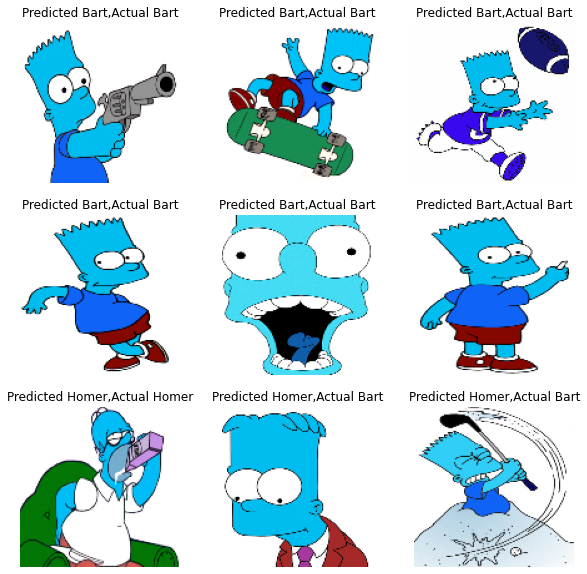

In [ ]:
class_names = ["Bart", "Homer"]
correct_preds = 0
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[i])
    plt.title(f"Predicted {class_names[pred_labels[i]]},Actual {class_names[y_test[i]]}")
    plt.axis(False)

for i in range(len(y_test)):
  if class_names[pred_labels[i]] == class_names[y_test[i]]:
    correct_preds+=1

print(correct_preds/len(y_test))